In [16]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder

# Load the datasets
viva_text_path = r"D:\ML\Final Viva Text.xlsx"  # Replace with the correct path
tfidf_vectors_path = r"D:\ML\tfidf_vectors.xlsx" # Replace with the correct path

# Load the datasets
viva_text_df = pd.read_excel(viva_text_path)
tfidf_vectors_df = pd.read_excel(tfidf_vectors_path)

# Step 1: Choose one numerical attribute from the TF-IDF vectors as a feature (X_train)
# We'll use the 'accuracy' column for this example
X_train = tfidf_vectors_df[['accuracy']].values

# Step 2: Encode the 'Label' column from viva_text_df as target (y_train)
# Labels are: 'Question', 'Answer', 'Statement'
le = LabelEncoder()
y_train = le.fit_transform(viva_text_df['Label'])

# Step 3: Train a Linear Regression model
reg = LinearRegression().fit(X_train, y_train)

# Step 4: Make predictions on the entire training set
y_train_pred = reg.predict(X_train)

# Step 5: Output the predicted values and actual labels for comparison
print("Predicted values:", y_train_pred)
print("Actual values (encoded):", y_train)


Predicted values: [1.01358482 1.01358482 1.01358482 1.01358482 1.01358482 1.01358482
 1.01358482 1.01358482 1.01358482 1.01358482 1.01358482 1.01358482
 1.01358482 1.01358482 1.01358482 1.01358482 1.01358482 1.01358482
 1.01358482 1.01358482 1.01358482 1.01358482 1.01358482 1.01358482
 1.01358482 1.01358482 1.01358482 1.01358482 1.01358482 1.01358482
 1.01358482 1.01358482 1.01358482 1.01358482 1.01358482 1.01358482
 1.01358482 1.01358482 1.01358482 1.01358482 1.01358482 1.01358482
 1.01358482 1.01358482 1.01358482 1.01358482 1.01358482 1.01358482
 1.01358482 1.01358482 1.01358482 1.01358482 1.01358482 1.01358482
 1.01358482 1.01358482 1.01358482 1.01358482 1.01358482 1.01358482
 1.01358482 1.01358482 1.01358482 1.01358482 1.01358482 1.01358482
 1.01358482 1.01358482 1.01358482 1.01358482 1.01358482 1.01358482
 1.01358482 1.01358482 1.01358482 1.01358482 1.01358482 1.01358482
 1.01358482 1.01358482 1.01358482 1.01358482 1.01358482 1.01358482
 1.01358482 1.01358482 1.01358482 1.01358482

In [18]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error
import numpy as np
from sklearn.model_selection import train_test_split

# Step 6: Calculate metrics on the training set
mse_train = mean_squared_error(y_train, y_train_pred)
rmse_train = np.sqrt(mse_train)
mape_train = mean_absolute_percentage_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

# Step 7: Split the data into train and test sets
X_train_split, X_test_split, y_train_split, y_test_split = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Train the model again on the training split
reg_split = LinearRegression().fit(X_train_split, y_train_split)

# Make predictions on the test data
y_test_pred = reg_split.predict(X_test_split)

# Step 8: Calculate metrics on the test set
mse_test = mean_squared_error(y_test_split, y_test_pred)
rmse_test = np.sqrt(mse_test)
mape_test = mean_absolute_percentage_error(y_test_split, y_test_pred)
r2_test = r2_score(y_test_split, y_test_pred)

# Output the calculated metrics for both train and test sets
print("Training Metrics:")
print(f"MSE: {mse_train}, RMSE: {rmse_train}, MAPE: {mape_train}, R2: {r2_train}")
print("\nTest Metrics:")
print(f"MSE: {mse_test}, RMSE: {rmse_test}, MAPE: {mape_test}, R2: {r2_test}")


Training Metrics:
MSE: 0.6606014043490223, RMSE: 0.8127738949726562, MAPE: 1476603357745985.0, R2: 6.37982506268564e-05

Test Metrics:
MSE: 0.6292588009017717, RMSE: 0.7932583443631537, MAPE: 1165162798565612.0, R2: -0.022854921573983722


In [20]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error
import numpy as np
from sklearn.model_selection import train_test_split

# Load the datasets
viva_text_path = r"D:\ML\Final Viva Text.xlsx"  # Replace with the correct path
tfidf_vectors_path = r"D:\ML\tfidf_vectors.xlsx" # Replace with the correct path

# Load the datasets
viva_text_df = pd.read_excel(viva_text_path)
tfidf_vectors_df = pd.read_excel(tfidf_vectors_path)

# Step 1: Choose multiple numerical attributes from the TF-IDF vectors as features (X_train)
# Here we'll use all numerical columns except the label column
X_train = tfidf_vectors_df.drop(columns=['Label'], errors='ignore').values

# Step 2: Encode the 'Label' column from viva_text_df as target (y_train)
le = LabelEncoder()
y_train = le.fit_transform(viva_text_df['Label'])

# Step 3: Train a Linear Regression model using all attributes
reg = LinearRegression().fit(X_train, y_train)

# Step 4: Make predictions on the entire training set
y_train_pred = reg.predict(X_train)

# Step 5: Output the predicted values and actual labels for comparison
print("Predicted values:", y_train_pred)
print("Actual values (encoded):", y_train)

# Step 6: Calculate metrics on the training set
mse_train = mean_squared_error(y_train, y_train_pred)
rmse_train = np.sqrt(mse_train)
mape_train = mean_absolute_percentage_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

# Step 7: Split the data into train and test sets
X_train_split, X_test_split, y_train_split, y_test_split = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Train the model again on the training split
reg_split = LinearRegression().fit(X_train_split, y_train_split)

# Make predictions on the test data
y_test_pred = reg_split.predict(X_test_split)

# Step 8: Calculate metrics on the test set
mse_test = mean_squared_error(y_test_split, y_test_pred)
rmse_test = np.sqrt(mse_test)
mape_test = mean_absolute_percentage_error(y_test_split, y_test_pred)
r2_test = r2_score(y_test_split, y_test_pred)

# Output the calculated metrics for both train and test sets
print("Training Metrics:")
print(f"MSE: {mse_train}, RMSE: {rmse_train}, MAPE: {mape_train}, R2: {r2_train}")
print("\nTest Metrics:")
print(f"MSE: {mse_test}, RMSE: {rmse_test}, MAPE: {mape_test}, R2: {r2_test}")


Predicted values: [ 1.01612224e+00 -1.12215055e-02  1.03189983e+00 -2.25740446e-02
  1.78174724e+00  1.89950369e-01  1.01746502e+00 -6.07820524e-02
  9.39670232e-01  1.99349784e-01  7.37441531e-01  1.06301688e-01
  1.13299674e+00 -3.33526951e-02  1.03296795e+00 -9.71590055e-02
  2.07215637e+00  1.97274588e-01  2.02588787e+00  6.88566195e-02
  1.95226881e+00  9.95678497e-01  2.11766735e+00 -1.73819162e-01
  1.06592693e+00 -1.51857359e-01  1.91748943e+00  1.07218478e+00
  2.05506270e+00  1.01231010e+00 -9.14092591e-02  1.97925701e+00
  1.04273357e+00  2.77596985e-01  8.17219324e-01  1.97803631e+00
  1.17547007e+00  2.08167400e+00  1.15836173e+00  1.75483769e+00
  1.05225506e+00  2.77596985e-01  9.93149384e-01 -2.48852404e-02
  1.93188710e+00  1.04754818e+00  2.77596985e-01  9.96468924e-01
  6.93168952e-02  6.95652465e-01  7.59113680e-01  1.61908780e-01
  1.05279544e+00 -7.74716423e-02  9.77593939e-01  1.95351517e+00
  1.19469124e+00  2.16488934e-01  1.12495011e+00  1.95914051e+00
 -2.745

In [22]:
import pandas as pd
from sklearn.cluster import KMeans

# Load the datasets
viva_text_path = r"D:\ML\Final Viva Text.xlsx"  # Replace with the correct path
tfidf_vectors_path = r"D:\ML\tfidf_vectors.xlsx" # Replace with the correct path

# Load the datasets
viva_text_df = pd.read_excel(viva_text_path)
tfidf_vectors_df = pd.read_excel(tfidf_vectors_path)

# Remove or ignore the target variable (Label column)
# Here we assume 'Label' column exists in viva_text_df and we need to ignore it for clustering
X_train = tfidf_vectors_df.drop(columns=['Label'], errors='ignore').values

# Perform k-means clustering with k=2
kmeans = KMeans(n_clusters=2, random_state=0, n_init="auto").fit(X_train)

# Output the labels assigned by k-means
print("K-Means Labels:", kmeans.labels_)

# Output the cluster centers
print("Cluster Centers:\n", kmeans.cluster_centers_)


K-Means Labels: [0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 1 0 0 0
 0 0 0 0 1 0 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 1 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 

C:\Users\sasic\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


In [24]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

# Load the datasets
viva_text_path = r"D:\ML\Final Viva Text.xlsx"  # Replace with the correct path
tfidf_vectors_path = r"D:\ML\tfidf_vectors.xlsx" # Replace with the correct path

# Load the datasets
viva_text_df = pd.read_excel(viva_text_path)
tfidf_vectors_df = pd.read_excel(tfidf_vectors_path)

# Remove or ignore the target variable (Label column)
X_train = tfidf_vectors_df.drop(columns=['Label'], errors='ignore').values

# Perform k-means clustering with k=2
kmeans = KMeans(n_clusters=2, random_state=42, n_init="auto").fit(X_train)

# Calculate the Silhouette Score
silhouette = silhouette_score(X_train, kmeans.labels_)
print("Silhouette Score:", silhouette)

# Calculate the Calinski-Harabasz Score
ch_score = calinski_harabasz_score(X_train, kmeans.labels_)
print("Calinski-Harabasz Score:", ch_score)

# Calculate the Davies-Bouldin Index
db_index = davies_bouldin_score(X_train, kmeans.labels_)
print("Davies-Bouldin Index:", db_index)


Silhouette Score: 0.031797769016441144
Calinski-Harabasz Score: 21.190181096175138
Davies-Bouldin Index: 2.6110508269372987


C:\Users\sasic\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


C:\Users\sasic\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\sasic\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\sasic\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\sasic\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Window

Optimal k based on Silhouette Score: 9
Optimal k based on Calinski-Harabasz Score: 2
Optimal k based on Davies-Bouldin Index: 2


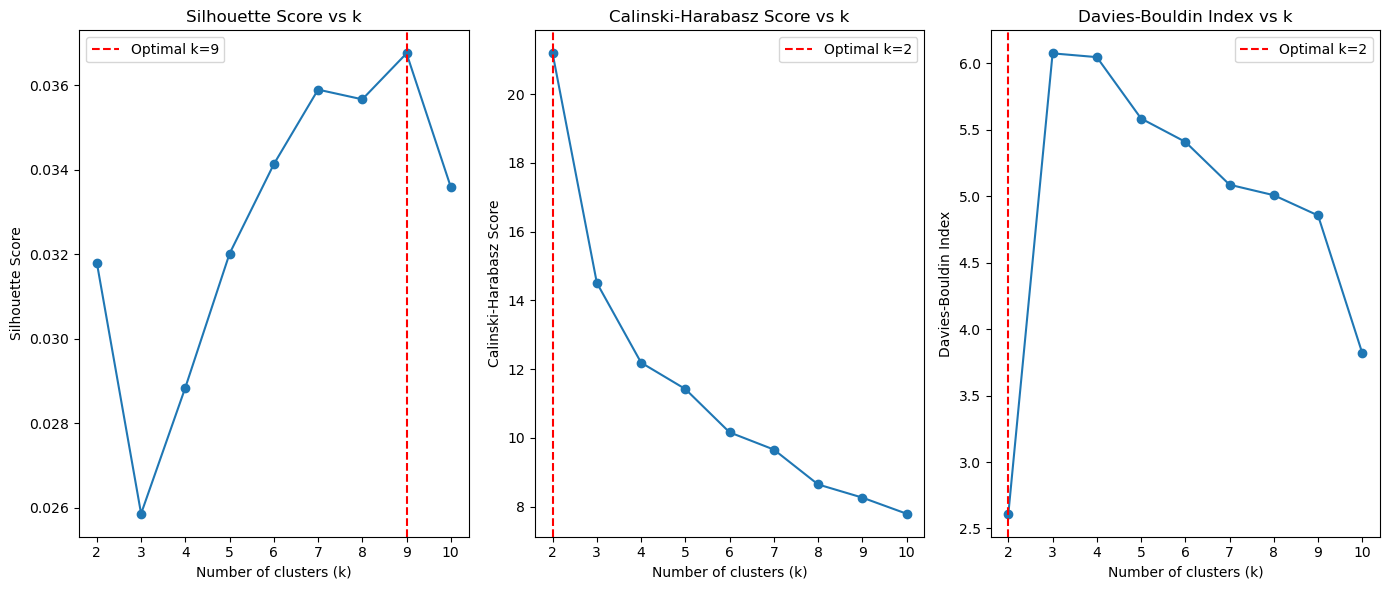

In [28]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
import matplotlib.pyplot as plt

# Load the datasets
viva_text_path = r"D:\ML\Final Viva Text.xlsx"  # Replace with the correct path
tfidf_vectors_path = r"D:\ML\tfidf_vectors.xlsx" # Replace with the correct path

# Load the datasets
viva_text_df = pd.read_excel(viva_text_path)
tfidf_vectors_df = pd.read_excel(tfidf_vectors_path)

# Remove or ignore the target variable (Label column)
X_train = tfidf_vectors_df.drop(columns=['Label'], errors='ignore').values

# Define the range of k values to test
k_values = range(2, 11)  # Test for k from 2 to 10

# Initialize lists to store the scores for each k
silhouette_scores = []
ch_scores = []
db_scores = []

# Perform k-means clustering for each k value and calculate the scores
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init="auto").fit(X_train)
    silhouette = silhouette_score(X_train, kmeans.labels_)
    ch_score = calinski_harabasz_score(X_train, kmeans.labels_)
    db_index = davies_bouldin_score(X_train, kmeans.labels_)
    
    silhouette_scores.append(silhouette)
    ch_scores.append(ch_score)
    db_scores.append(db_index)

# Find the optimal k based on each metric
optimal_k_silhouette = k_values[silhouette_scores.index(max(silhouette_scores))]
optimal_k_ch = k_values[ch_scores.index(max(ch_scores))]
optimal_k_db = k_values[db_scores.index(min(db_scores))]

print(f"Optimal k based on Silhouette Score: {optimal_k_silhouette}")
print(f"Optimal k based on Calinski-Harabasz Score: {optimal_k_ch}")
print(f"Optimal k based on Davies-Bouldin Index: {optimal_k_db}")

# Plot the scores against k values
plt.figure(figsize=(14, 6))

plt.subplot(1, 3, 1)
plt.plot(k_values, silhouette_scores, marker='o')
plt.title('Silhouette Score vs k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.axvline(x=optimal_k_silhouette, color='red', linestyle='--', label=f'Optimal k={optimal_k_silhouette}')
plt.legend()

plt.subplot(1, 3, 2)
plt.plot(k_values, ch_scores, marker='o')
plt.title('Calinski-Harabasz Score vs k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Calinski-Harabasz Score')
plt.axvline(x=optimal_k_ch, color='red', linestyle='--', label=f'Optimal k={optimal_k_ch}')
plt.legend()

plt.subplot(1, 3, 3)
plt.plot(k_values, db_scores, marker='o')
plt.title('Davies-Bouldin Index vs k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Davies-Bouldin Index')
plt.axvline(x=optimal_k_db, color='red', linestyle='--', label=f'Optimal k={optimal_k_db}')
plt.legend()

plt.tight_layout()
plt.show()


C:\Users\sasic\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\sasic\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\sasic\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\sasic\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Window

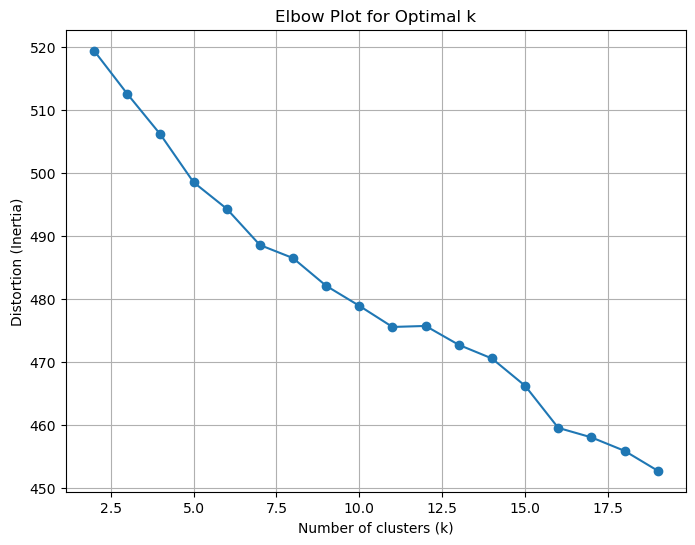

In [30]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Load the datasets
viva_text_path = r"D:\ML\Final Viva Text.xlsx"  
tfidf_vectors_path = r"D:\ML\tfidf_vectors.xlsx" 

# Load the datasets
viva_text_df = pd.read_excel(viva_text_path)
tfidf_vectors_df = pd.read_excel(tfidf_vectors_path)

# Remove or ignore the target variable (Label column)
X_train = tfidf_vectors_df.drop(columns=['Label'], errors='ignore').values

# Initialize list to store the distortions (inertia)
distortions = []

# Calculate distortions for a range of k values
for k in range(2, 20):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init="auto").fit(X_train)
    distortions.append(kmeans.inertia_)

# Plot the elbow plot
plt.figure(figsize=(8, 6))
plt.plot(range(2, 20), distortions, marker='o')
plt.title('Elbow Plot for Optimal k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Distortion (Inertia)')
plt.grid(True)
plt.show()
